## **05. Pra-pemrosesan Data (Data Preprocessing)**

---

Casefolding

Cleansing

Normalization

Stopword Removal

Stemming

Tokenization

Padding

## Installing Package

In [69]:
!pip install sastrawi
!pip install emoji

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Import Library

In [70]:
import pandas as pd
import numpy
import collections
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re
from nltk import tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

import warnings
warnings.filterwarnings("ignore")

from IPython.display import display, HTML

# Load Data Train

In [71]:
data = pd.read_csv(
    'dataset_integration(penelitian).csv', 
    sep=","
)
data

full_text  \
0                                                                                                            pengabdian yang terpuji meskipun terlihat biasa   
1                                                                                                                                    baru saja mengirim foto   
2                                                                                              apa kabar dunia twitter ? masihkah selucu dan seabsurd dulu ?   
3                                                                               yah gimana sih yang yaudah susul aku dulu kita sarapan bubur di tempat biasa   
4                                                                                                                        saja ka dorg suro beli medium 2 set   
...                                                                                                                                                      ...   
28712                                                                                                    Aku pengen bnget nih,daerah jakarta barat ada g si?   
28713  Selamat Hari Raya Tri Suci Waisak untuk seluruh umat Buddha di Indonesia. \n\nSabbe Satta Bhavantu Sukithatta. Damai di hati, damai di bumi.\n\n#H...   
28714  Kandungan serat di passion fruit atau markisa ini berfungsi untuk menghindari masalah sembelit atau susah buang air besar. Bukan hanya itu, kandun...   
28715  Selamat memperingati Hari Kebangkitan Nasional.\nTema tahun ini: \Pembangunan Sumber Daya Manusia Memperkuat Fondasi Kebangkitan Nasional Indonesi...   
28716  Olive oil dapat digunakan untuk mengobati kulit ruam atau kemerahan karena memiliki antioksidan yang berguna melucuti radikal bebas dan mengurangi...   

       emotion  
0      Neutral  
1      Neutral  
2      Neutral  
3      Neutral  
4      Neutral  
...        ...  
28712  Neutral  
28713      Joy  
28714     Love  
28715      Joy  
28716     Love  

[28717 rows x 2 columns]

In [72]:
train_data = data[['full_text','emotion']]

In [73]:
nan_tweet = train_data['full_text'].isna().sum()
nan_label = train_data['emotion'].isna().sum()

print(f"Jumlah nilai NaN di kolom 'full_text': {nan_tweet}")
print(f"Jumlah nilai NaN di kolom 'label': {nan_label}")


Jumlah nilai NaN di kolom 'full_text': 2
Jumlah nilai NaN di kolom 'label': 15


In [74]:
train_data = train_data.dropna(subset=['full_text', 'emotion'])

print("Data yang telah dibersihkan")

Data yang telah dibersihkan


In [75]:
train_data.reset_index(inplace=True,drop=True)
train_data

full_text  \
0                                                                                                            pengabdian yang terpuji meskipun terlihat biasa   
1                                                                                                                                    baru saja mengirim foto   
2                                                                                              apa kabar dunia twitter ? masihkah selucu dan seabsurd dulu ?   
3                                                                               yah gimana sih yang yaudah susul aku dulu kita sarapan bubur di tempat biasa   
4                                                                                                                        saja ka dorg suro beli medium 2 set   
...                                                                                                                                                      ...   
28695                                                                                                    Aku pengen bnget nih,daerah jakarta barat ada g si?   
28696  Selamat Hari Raya Tri Suci Waisak untuk seluruh umat Buddha di Indonesia. \n\nSabbe Satta Bhavantu Sukithatta. Damai di hati, damai di bumi.\n\n#H...   
28697  Kandungan serat di passion fruit atau markisa ini berfungsi untuk menghindari masalah sembelit atau susah buang air besar. Bukan hanya itu, kandun...   
28698  Selamat memperingati Hari Kebangkitan Nasional.\nTema tahun ini: \Pembangunan Sumber Daya Manusia Memperkuat Fondasi Kebangkitan Nasional Indonesi...   
28699  Olive oil dapat digunakan untuk mengobati kulit ruam atau kemerahan karena memiliki antioksidan yang berguna melucuti radikal bebas dan mengurangi...   

       emotion  
0      Neutral  
1      Neutral  
2      Neutral  
3      Neutral  
4      Neutral  
...        ...  
28695  Neutral  
28696      Joy  
28697     Love  
28698      Joy  
28699     Love  

[28700 rows x 2 columns]

# Preprocessing

In [76]:
import copy

train_data_copy = copy.deepcopy(train_data)


## 01. Case Folding

### a. Lowercase

In [77]:
def tweet_lowercase(tweet):
    tweet = tweet.lower()
    return tweet

In [78]:
%%time
train_data["full_text"] = train_data["full_text"].apply(tweet_lowercase)

CPU times: total: 15.6 ms
Wall time: 43 ms


In [79]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

In [80]:
%%time
train_data_copy["full_text"] = train_data_copy["full_text"].apply(tweet_lowercase)

CPU times: total: 0 ns
Wall time: 22.1 ms


## 02. Cleansing

### a. Menghapus username

In [81]:
import re

In [82]:
def tweet_delete_username(tweet):

    userPattern = r'@\w+'
    

    tweet = re.sub(userPattern, '', tweet)
    
    return tweet


In [83]:
%%time
train_data["full_text"] = train_data["full_text"].apply(tweet_delete_username)

CPU times: total: 15.6 ms
Wall time: 50.4 ms


In [84]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

In [85]:
%%time
train_data_copy["full_text"] = train_data_copy["full_text"].apply(tweet_delete_username)

CPU times: total: 0 ns
Wall time: 51.5 ms


### b. Menghapus url

In [86]:
def tweet_delete_url(tweet):
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|(www\.)[^ ]*|url)" #Pola ngehapus url
    tweet = re.sub(urlPattern, '', tweet)
    return tweet

In [87]:
%%time
train_data["full_text"] = train_data["full_text"].apply(tweet_delete_url)

CPU times: total: 78.1 ms
Wall time: 325 ms


In [88]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

In [89]:
%%time
train_data_copy["full_text"] = train_data_copy["full_text"].apply(tweet_delete_url)

CPU times: total: 109 ms
Wall time: 225 ms


### c. Menghapus kelebihan huruf

In [90]:
def tweet_delete_extra_letters(tweet):
    sequencePattern   = r'([A-Za-z])\1{2,}' 
    seqReplacePattern = r'\1' #Pola ngereplace yang kelebihan huruf tiga kali
    tweet = re.sub(sequencePattern, seqReplacePattern, tweet)
    
    return tweet

In [91]:
%%time
train_data["full_text"] = train_data["full_text"].apply(tweet_delete_extra_letters)

CPU times: total: 109 ms
Wall time: 282 ms


In [92]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

In [93]:
%%time
train_data_copy["full_text"] = train_data_copy["full_text"].apply(tweet_delete_extra_letters)

CPU times: total: 109 ms
Wall time: 238 ms


### d. Menghapus new line dan new text

In [94]:
def tweet_delete_new_line_new_text(tweet):
    tweet = re.sub(r'\\[nt]', ' ', tweet)
    return tweet

In [95]:
%%time
train_data["full_text"] = train_data["full_text"].apply(tweet_delete_new_line_new_text)

CPU times: total: 0 ns
Wall time: 54 ms


In [96]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

In [97]:
%%time
train_data_copy["full_text"] = train_data_copy["full_text"].apply(tweet_delete_new_line_new_text)

CPU times: total: 15.6 ms
Wall time: 38.7 ms


### e. Menghapus Hastag

In [98]:
def tweet_remove_hashtags(tweet):
    hashtag= r'#\w+'
    tweet = re.sub(hashtag, '', tweet)
    return tweet

In [99]:
%%time
train_data["full_text"] = train_data["full_text"].apply(tweet_remove_hashtags)

CPU times: total: 0 ns
Wall time: 34.9 ms


In [100]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})

pd.options.display.max_colwidth = 150

display(HTML(comparison_df.head(10).to_html()))

In [101]:
%%time
train_data_copy["full_text"] = train_data_copy["full_text"].apply(tweet_remove_hashtags)

CPU times: total: 0 ns
Wall time: 31 ms


### f. Menghapus angka

In [102]:
def tweet_delete_number(tweet):
    number = r'\d+' 
    tweet = re.sub(number, '', tweet)
    return tweet

In [103]:
%%time
train_data["full_text"] = train_data["full_text"].apply(tweet_delete_number)

CPU times: total: 46.9 ms
Wall time: 198 ms


In [104]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

In [105]:
%%time
train_data_copy["full_text"] = train_data_copy["full_text"].apply(tweet_delete_number)

CPU times: total: 0 ns
Wall time: 118 ms


### g. Menghapus tanda baca

In [106]:
def tweet_delete_punctuation(tweet):
    punctuationPattern = r'[^\w\s]' 
    tweet = re.sub(punctuationPattern, ' ', tweet)
    
    return tweet

In [107]:
%%time
train_data["full_text"] = train_data["full_text"].apply(tweet_delete_punctuation)

CPU times: total: 46.9 ms
Wall time: 137 ms


In [108]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

In [109]:
%%time
train_data_copy["full_text"] = train_data_copy["full_text"].apply(tweet_delete_punctuation)

CPU times: total: 31.2 ms
Wall time: 142 ms


### h. Menghapus Extra Spasi

In [110]:
def tweet_delete_extra_space(tweet):
    tweet = re.sub(r"\s+", " ", tweet)
    tweet = re.sub(r"^\s+|\s+$", "", tweet)
    
    return tweet

In [111]:
%%time
train_data["full_text"] = train_data["full_text"].apply(tweet_delete_extra_space)

CPU times: total: 281 ms
Wall time: 427 ms


In [112]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

In [113]:
%%time
train_data_copy["full_text"] = train_data_copy["full_text"].apply(tweet_delete_extra_space)

CPU times: total: 297 ms
Wall time: 400 ms


## 03. Normalization

### Import Kamus

In [114]:
kamus_singkatan = pd.read_csv("../02. Pengumpulan Data (Data Collection)/Dataset/Kamus/kamus_singkatan2.csv",delimiter=",")
kamus_singkatan

Unnamed: 0.1  Unnamed: 0 singkatan kata asal
0                0         NaN    aamiin      amin
1                1         NaN      adek     adik 
2                2         NaN      adlh    adalah
3                3         NaN        ad      ada 
4                4         NaN       aer      air 
...            ...         ...       ...       ...
1373          1572         NaN       elu      kamu
1374          1573         NaN        lo      kamu
1375          1574         NaN        lu      kamu
1376          1575         NaN     anjim    anjing
1377          1576         NaN      ajgg    anjing

[1378 rows x 4 columns]

In [115]:
def create_kamus():
      kamus = {}
      for i in range(len(kamus_singkatan)):
          kamus[kamus_singkatan["singkatan"][i]]=kamus_singkatan["kata asal"][i].lower().strip()
      return kamus

In [116]:
kamus = create_kamus()
kamus

{'aamiin': 'amin',
 'adek': 'adik',
 'adlh': 'adalah',
 'ad': 'ada',
 'aer': 'air',
 'aiskrim': 'es krim',
 'aj': 'saja',
 'aja': 'saja',
 'ajah': 'saja',
 'ajalah': 'saja',
 'aje': 'saja',
 'ajh': 'saja',
 'ajj': 'saja',
 'aku': 'saya',
 'ak': 'saya',
 'akoh': 'saya',
 'akutu': 'saya',
 'aq': 'saya',
 'alesan': 'alasan',
 'ama': 'sama',
 'amaca': 'ah masa',
 'amuh': 'kamu',
 'ancur': 'hancur',
 'ane': 'saya',
 'anget': 'hangat',
 'anjeng': 'anjing',
 'ank': 'anak',
 'apah': 'apa',
 'aph': 'apa',
 'apo': 'apa',
 'apose': 'apa',
 'apz': 'apa',
 'artine': 'artinya',
 'asek': 'asik',
 'ati2': 'hati-hati',
 'atit': 'sakit',
 'atu': 'satu',
 'atw': 'atau',
 'ayang': 'sayang',
 'ayuk': 'ayo',
 'babang': 'abang',
 'bae': 'baik',
 'bais': 'habis',
 'bakalan': 'akan',
 'bales': 'balas',
 'bandingin': 'bandingkan',
 'banget': 'sekali',
 'bangett': 'sangat',
 'banyakin': 'perbanyak',
 'barengan': 'bersamaan',
 'baryaw': 'sabar ya',
 'baso': 'bakso',
 'bay': 'selamat tinggal',
 'bbrp': 'beberapa',

In [117]:
def tweet_replace_contractions(tweet):
    pattern = re.compile(r'\b(' + '|'.join(re.escape(contraction) for contraction in kamus.keys()) + r')\b')
    tweet = pattern.sub(lambda x: kamus[x.group()], tweet)
    return tweet

In [118]:
%%time
for i in range(len(train_data)):
    print(f"Baris ke-{i}")
    kalimat = train_data["full_text"][i]
    kalimat = tweet_replace_contractions(kalimat)
    train_data.at[i, "full_text"] = kalimat

Baris ke-0
Baris ke-1
Baris ke-2
Baris ke-3
Baris ke-4
Baris ke-5
Baris ke-6
Baris ke-7
Baris ke-8
Baris ke-9
Baris ke-10
Baris ke-11
Baris ke-12
Baris ke-13
Baris ke-14
Baris ke-15
Baris ke-16
Baris ke-17
Baris ke-18
Baris ke-19
Baris ke-20
Baris ke-21
Baris ke-22
Baris ke-23
Baris ke-24
Baris ke-25
Baris ke-26
Baris ke-27
Baris ke-28
Baris ke-29
Baris ke-30
Baris ke-31
Baris ke-32
Baris ke-33
Baris ke-34
Baris ke-35
Baris ke-36
Baris ke-37
Baris ke-38
Baris ke-39
Baris ke-40
Baris ke-41
Baris ke-42
Baris ke-43
Baris ke-44
Baris ke-45
Baris ke-46
Baris ke-47
Baris ke-48
Baris ke-49
Baris ke-50
Baris ke-51
Baris ke-52
Baris ke-53
Baris ke-54
Baris ke-55
Baris ke-56
Baris ke-57
Baris ke-58
Baris ke-59
Baris ke-60
Baris ke-61
Baris ke-62
Baris ke-63
Baris ke-64
Baris ke-65
Baris ke-66
Baris ke-67
Baris ke-68
Baris ke-69
Baris ke-70
Baris ke-71
Baris ke-72
Baris ke-73
Baris ke-74
Baris ke-75
Baris ke-76
Baris ke-77
Baris ke-78
Baris ke-79
Baris ke-80
Baris ke-81
Baris ke-82
Baris ke-83
Ba

In [119]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

In [120]:
%%time
for i in range(len(train_data_copy)):
    print(f"Baris ke-{i}")
    kalimat = train_data_copy["full_text"][i]
    kalimat = tweet_replace_contractions(kalimat)
    train_data_copy.at[i, "full_text"] = kalimat

Baris ke-0
Baris ke-1
Baris ke-2
Baris ke-3
Baris ke-4
Baris ke-5
Baris ke-6
Baris ke-7
Baris ke-8
Baris ke-9
Baris ke-10
Baris ke-11
Baris ke-12
Baris ke-13
Baris ke-14
Baris ke-15
Baris ke-16
Baris ke-17
Baris ke-18
Baris ke-19
Baris ke-20
Baris ke-21
Baris ke-22
Baris ke-23
Baris ke-24
Baris ke-25
Baris ke-26
Baris ke-27
Baris ke-28
Baris ke-29
Baris ke-30
Baris ke-31
Baris ke-32
Baris ke-33
Baris ke-34
Baris ke-35
Baris ke-36
Baris ke-37
Baris ke-38
Baris ke-39
Baris ke-40
Baris ke-41
Baris ke-42
Baris ke-43
Baris ke-44
Baris ke-45
Baris ke-46
Baris ke-47
Baris ke-48
Baris ke-49
Baris ke-50
Baris ke-51
Baris ke-52
Baris ke-53
Baris ke-54
Baris ke-55
Baris ke-56
Baris ke-57
Baris ke-58
Baris ke-59
Baris ke-60
Baris ke-61
Baris ke-62
Baris ke-63
Baris ke-64
Baris ke-65
Baris ke-66
Baris ke-67
Baris ke-68
Baris ke-69
Baris ke-70
Baris ke-71
Baris ke-72
Baris ke-73
Baris ke-74
Baris ke-75
Baris ke-76
Baris ke-77
Baris ke-78
Baris ke-79
Baris ke-80
Baris ke-81
Baris ke-82
Baris ke-83
Ba

## 04. Stopword Removal

Library : Sastrawi

In [121]:
def tweet_stopwords_removal(tweet):
    factory = StopWordRemoverFactory()
    stopword = factory.create_stop_word_remover()
    tweet = stopword.remove(tweet)
    return tweet

In [122]:
%%time
for i in range(len(train_data)):
    print(f"Baris ke-{i}")
    kalimat = train_data["full_text"][i]
    kalimat = tweet_stopwords_removal(kalimat)
    train_data.at[i, "full_text"] = kalimat

Baris ke-0
Baris ke-1
Baris ke-2
Baris ke-3
Baris ke-4
Baris ke-5
Baris ke-6
Baris ke-7
Baris ke-8
Baris ke-9
Baris ke-10
Baris ke-11
Baris ke-12
Baris ke-13
Baris ke-14
Baris ke-15
Baris ke-16
Baris ke-17
Baris ke-18
Baris ke-19
Baris ke-20
Baris ke-21
Baris ke-22
Baris ke-23
Baris ke-24
Baris ke-25
Baris ke-26
Baris ke-27
Baris ke-28
Baris ke-29
Baris ke-30
Baris ke-31
Baris ke-32
Baris ke-33
Baris ke-34
Baris ke-35
Baris ke-36
Baris ke-37
Baris ke-38
Baris ke-39
Baris ke-40
Baris ke-41
Baris ke-42
Baris ke-43
Baris ke-44
Baris ke-45
Baris ke-46
Baris ke-47
Baris ke-48
Baris ke-49
Baris ke-50
Baris ke-51
Baris ke-52
Baris ke-53
Baris ke-54
Baris ke-55
Baris ke-56
Baris ke-57
Baris ke-58
Baris ke-59
Baris ke-60
Baris ke-61
Baris ke-62
Baris ke-63
Baris ke-64
Baris ke-65
Baris ke-66
Baris ke-67
Baris ke-68
Baris ke-69
Baris ke-70
Baris ke-71
Baris ke-72
Baris ke-73
Baris ke-74
Baris ke-75
Baris ke-76
Baris ke-77
Baris ke-78
Baris ke-79
Baris ke-80
Baris ke-81
Baris ke-82
Baris ke-83
Ba

In [123]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

In [124]:
%%time
for i in range(len(train_data_copy)):
    print(f"Baris ke-{i}")
    kalimat = train_data_copy["full_text"][i]
    kalimat = tweet_stopwords_removal(kalimat)
    train_data_copy.at[i, "full_text"] = kalimat

Baris ke-0
Baris ke-1
Baris ke-2
Baris ke-3
Baris ke-4
Baris ke-5
Baris ke-6
Baris ke-7
Baris ke-8
Baris ke-9
Baris ke-10
Baris ke-11
Baris ke-12
Baris ke-13
Baris ke-14
Baris ke-15
Baris ke-16
Baris ke-17
Baris ke-18
Baris ke-19
Baris ke-20
Baris ke-21
Baris ke-22
Baris ke-23
Baris ke-24
Baris ke-25
Baris ke-26
Baris ke-27
Baris ke-28
Baris ke-29
Baris ke-30
Baris ke-31
Baris ke-32
Baris ke-33
Baris ke-34
Baris ke-35
Baris ke-36
Baris ke-37
Baris ke-38
Baris ke-39
Baris ke-40
Baris ke-41
Baris ke-42
Baris ke-43
Baris ke-44
Baris ke-45
Baris ke-46
Baris ke-47
Baris ke-48
Baris ke-49
Baris ke-50
Baris ke-51
Baris ke-52
Baris ke-53
Baris ke-54
Baris ke-55
Baris ke-56
Baris ke-57
Baris ke-58
Baris ke-59
Baris ke-60
Baris ke-61
Baris ke-62
Baris ke-63
Baris ke-64
Baris ke-65
Baris ke-66
Baris ke-67
Baris ke-68
Baris ke-69
Baris ke-70
Baris ke-71
Baris ke-72
Baris ke-73
Baris ke-74
Baris ke-75
Baris ke-76
Baris ke-77
Baris ke-78
Baris ke-79
Baris ke-80
Baris ke-81
Baris ke-82
Baris ke-83
Ba

## 05. Stemming

mpstemmer

In [125]:
!pip install --upgrade git+https://github.com/ariaghora/mpstemmer.git

!pip install python-Levenshtein

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/ariaghora/mpstemmer.git to c:\users\temp\appdata\local\temp\pip-req-build-ta28q75t
  Resolved https://github.com/ariaghora/mpstemmer.git to commit 25a5fd923af163a7eac3a5ec976984156ca8fa8b
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/ariaghora/mpstemmer.git 'C:\Users\TEMP\AppData\Local\Temp\pip-req-build-ta28q75t'

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [126]:
from mpstemmer import MPStemmer

def stemming_sentences(tweet):
    stemmer = MPStemmer()

    if isinstance(tweet, list):
        return [stemmer.stem(i) for i in tweet]
    else:
        return stemmer.stem(tweet)


In [127]:
%%time
for i in range(len(train_data)):
    print(f"Baris ke-{i}")
    kalimat = train_data["full_text"][i]
    kalimat = stemming_sentences(kalimat)
    train_data.at[i, "full_text"] = kalimat

Baris ke-0
Baris ke-1
Baris ke-2
Baris ke-3
Baris ke-4
Baris ke-5
Baris ke-6
Baris ke-7
Baris ke-8
Baris ke-9
Baris ke-10
Baris ke-11
Baris ke-12
Baris ke-13
Baris ke-14
Baris ke-15
Baris ke-16
Baris ke-17
Baris ke-18
Baris ke-19
Baris ke-20
Baris ke-21
Baris ke-22
Baris ke-23
Baris ke-24
Baris ke-25
Baris ke-26
Baris ke-27
Baris ke-28
Baris ke-29
Baris ke-30
Baris ke-31
Baris ke-32
Baris ke-33
Baris ke-34
Baris ke-35
Baris ke-36
Baris ke-37
Baris ke-38
Baris ke-39
Baris ke-40
Baris ke-41
Baris ke-42
Baris ke-43
Baris ke-44
Baris ke-45
Baris ke-46
Baris ke-47
Baris ke-48
Baris ke-49
Baris ke-50
Baris ke-51
Baris ke-52
Baris ke-53
Baris ke-54
Baris ke-55
Baris ke-56
Baris ke-57
Baris ke-58
Baris ke-59
Baris ke-60
Baris ke-61
Baris ke-62
Baris ke-63
Baris ke-64
Baris ke-65
Baris ke-66
Baris ke-67
Baris ke-68
Baris ke-69
Baris ke-70
Baris ke-71
Baris ke-72
Baris ke-73
Baris ke-74
Baris ke-75
Baris ke-76
Baris ke-77
Baris ke-78
Baris ke-79
Baris ke-80
Baris ke-81
Baris ke-82
Baris ke-83
Ba

In [128]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

In [129]:
%%time
for i in range(len(train_data_copy)):
    print(f"Baris ke-{i}")
    kalimat = train_data_copy["full_text"][i]
    kalimat = stemming_sentences(kalimat)
    train_data_copy.at[i, "full_text"] = kalimat

Baris ke-0
Baris ke-1
Baris ke-2
Baris ke-3
Baris ke-4
Baris ke-5
Baris ke-6
Baris ke-7
Baris ke-8
Baris ke-9
Baris ke-10
Baris ke-11
Baris ke-12
Baris ke-13
Baris ke-14
Baris ke-15
Baris ke-16
Baris ke-17
Baris ke-18
Baris ke-19
Baris ke-20
Baris ke-21
Baris ke-22
Baris ke-23
Baris ke-24
Baris ke-25
Baris ke-26
Baris ke-27
Baris ke-28
Baris ke-29
Baris ke-30
Baris ke-31
Baris ke-32
Baris ke-33
Baris ke-34
Baris ke-35
Baris ke-36
Baris ke-37
Baris ke-38
Baris ke-39
Baris ke-40
Baris ke-41
Baris ke-42
Baris ke-43
Baris ke-44
Baris ke-45
Baris ke-46
Baris ke-47
Baris ke-48
Baris ke-49
Baris ke-50
Baris ke-51
Baris ke-52
Baris ke-53
Baris ke-54
Baris ke-55
Baris ke-56
Baris ke-57
Baris ke-58
Baris ke-59
Baris ke-60
Baris ke-61
Baris ke-62
Baris ke-63
Baris ke-64
Baris ke-65
Baris ke-66
Baris ke-67
Baris ke-68
Baris ke-69
Baris ke-70
Baris ke-71
Baris ke-72
Baris ke-73
Baris ke-74
Baris ke-75
Baris ke-76
Baris ke-77
Baris ke-78
Baris ke-79
Baris ke-80
Baris ke-81
Baris ke-82
Baris ke-83
Ba

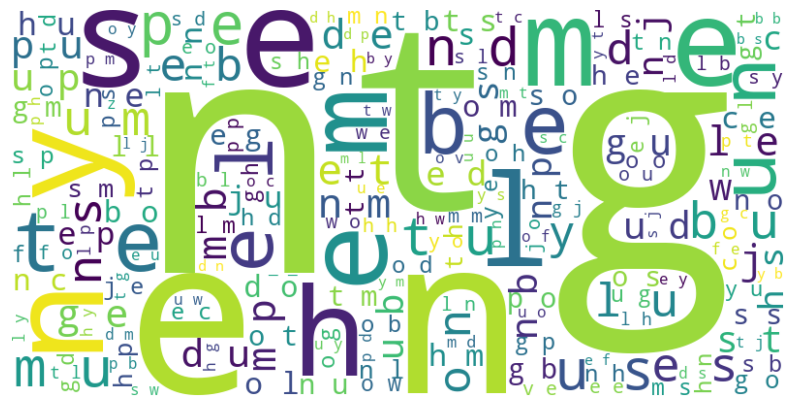

In [130]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert lists of tweets into a single string
all_tweets = ' '.join([tweet for sublist in train_data['full_text'] for tweet in sublist])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets)

# Display the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [131]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

In [132]:
train_data.to_csv("./Dataset_Clean/Dataset_Clean(penelitian).csv")